# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*

**Estimated time:** 20 mins presenting

## Chapter 3: Storing data, the nitty gritty

### Data types determine what information can be stored

#### Types of data
Multiple data types exist. There are three important distinctions between these types:
- The bit-depth; 
    - Determines how many values can be stored, e.g. 0-255 values for a bit depth of 8 (unsigned).
    - More depth takes more disk space.
    - **Relevance:** especially when generating large amounts of images, a trade-off between storage requirements and value range becomes important. Typically, you'll use 8-bit or 16-bit images.
- Signed or unsigned; 
    - Whether negative values can be stored.
    - **Relevance:** usually only positive numbers are used in images, so you won't see the 'signed' format often.    
- Integer vs. Floating Point;
    - Integer can only store whole numbers.
    - Floating Point is a [technically more complicated]((https://en.wikipedia.org/wiki/Double-precision_floating-point_format)) format, which can store (very large and very small) numbers with a decimal point, such as 2.0005, 3.14159, 100023.93, et cetera.
    - **Relevance:** Floating point images are often used in intermediate steps of image processing, but are rarely used for storing raw images.
    
The table below summarizes common image data formats. In practice, **uint8** and **uint16** are used most frequently.

| Type             | Bit-depth | dtype     | Values |
| ---------------- | --------- | --------- | ------- |
| Unsigned integer | 8         | `uint8`   | 0 to 255 |
| Signed integer   | 8         | `int8`    | -128 to 127 |
| Unsigned integer | 16        | `uint16`  | 0 to 65535 |
| Signed integer   | 16        | `int16`   | -32768 to 32767 |
| Unsigned integer | 32        | `uint32`  | 0 to 4,294,967,295 |
| Signed integer   | 32        | `int32`   | -2,147,483,648 to 2,147,483,647 |
| Floating point   | 32        | `float32` | -3.4E+38 to 3.4E+38 [*](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) |
| Floating point   | 64        | `float64` | [**](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) |

 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tifffile as tiff
import numpy as np

#### Difference between 8-bit and 16-bit sometimes important

The type of this image is:  uint8
uint16 has  256  possible values


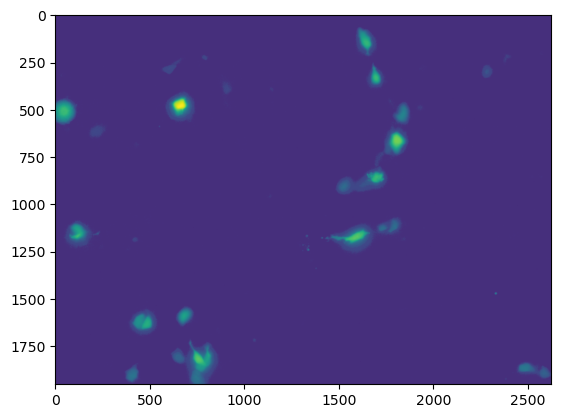

In [55]:
# Load a picture of fluorescently labeled HeLa cells (8 bit)
img_path8bit = 'images/biological/exampleHeLa-8bit.tif'
img_HeLa_8bit = tiff.imread(img_path8bit)

# Display information about the image
print('The type of this image is: ', img_HeLa_8bit.dtype)
print('uint16 has ', 2**8, ' possible values')

# Show the image
_ = plt.imshow(np.log(img_HeLa_8bit+1), cmap='viridis')

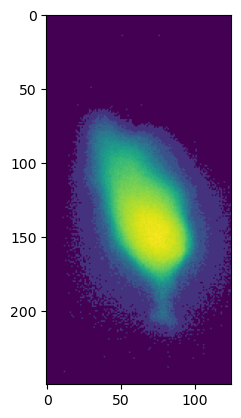

In [45]:
_ = plt.imshow(np.log(img_HeLa_8bit[0:250,1575:1700]+1), 
               cmap='viridis')

The type of this image is:  uint16
uint16 has  65536  possible values


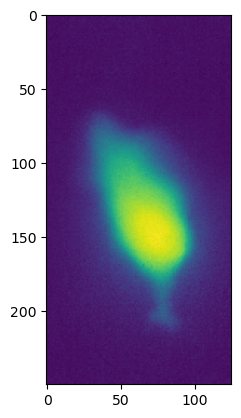

In [54]:
# Load a picture of fluorescently labeled HeLa cells
img_path = 'images/biological/exampleHeLa.tif'
img_HeLa = tiff.imread(img_path)

# Display information about the image
print('The type of this image is: ', img_HeLa.dtype)
print('uint16 has ', 2**16, ' possible values')

_ = plt.imshow(np.log(img_HeLa[0:250,1575:1700]+1), 
               cmap='viridis')

#### Take home messages

- When acquiring data:
    - Decide the relevant biological range and amount of detail within that range that you need.
    - Make sure the file format you save to allows for that range and level of detail.
        - Histograms can help during that assessment.
- Generally, opt for the uint16 format and save your images as .tif to prevent losses.
    
- Other pitfalls:
    - Saturated pixels: 
        - Occurs when your real signal  falls outside your file format range.
        - Values higher than the maximum value will collapse to the maximum.
        - Example: Say you measure a photon count of 466, but your storage range is 0-255, then the value 466 will be stored as 255. Information is lost.

## Let's get real (size)

Text(0, 0.5, 'y [pixels]')

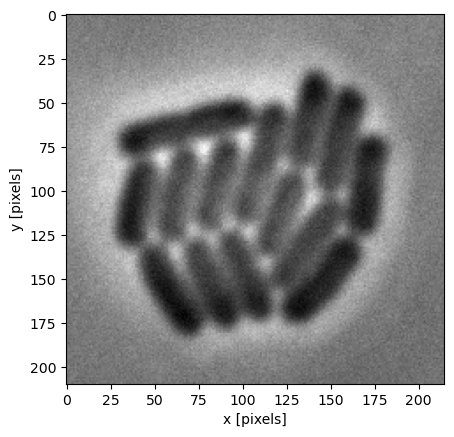

In [61]:
# Example image
img = tiff.imread('images/biological/microcolony_ecoli.tif')
plt.imshow(img, cmap="gray")
plt.xlabel('x [pixels]'); plt.ylabel('y [pixels]')

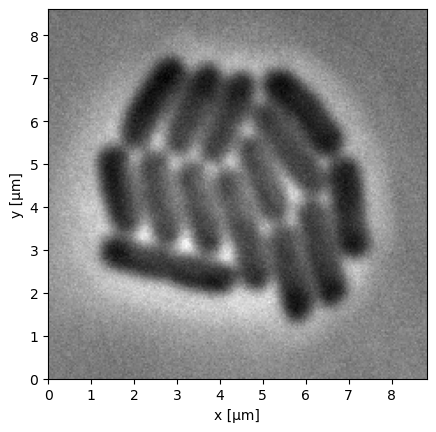

In [ ]:
# Luckily, we know the size of a pixel
pixel_size = 0.041  # µm per pixel
    # In many modern setups, this is stored in the metadata
    # E.g. FIJI > Image > Show Info
    
# Get the number of pixels per dimension    
nx = img.shape[1]
ny = img.shape[0]

# Define extent: [xmin, xmax, ymin, ymax]
extent = [0, nx * pixel_size, 0, ny * pixel_size]

# Make the plot
plt.imshow(img, extent=extent, origin="lower", cmap="gray")
plt.xlabel("x [µm]")
plt.ylabel("y [µm]")
plt.show()

# This is a particular example, but determining lengths
# or areas can often be relevant, in which case you
# need to know the pixel size.

## Not sure yet below sections are useful

#### Statistics

In [26]:
# Image statistics
print('Mean: ',img_HeLa.mean())
print('Min: ', img_HeLa.min())
print('Max: ', img_HeLa.max())
print('Standard dev: ', img_HeLa.std())

# Now the mode and percentiles
print('Mode: ', np.bincount(img_HeLa.ravel()).argmax())
print('5th percentile: ', np.percentile(img_HeLa, 5))
print('95th percentile: ', np.percentile(img_HeLa, 95))

Mean:  430.6844697667808
Min:  324
Max:  14822
Standard dev:  277.61160166795554
Mode:  403
5th percentile:  393.0
95th percentile:  441.0


New maximum determined at:  3817.0


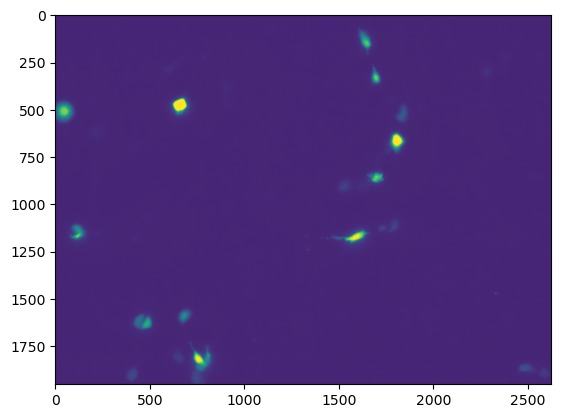

In [ ]:
# For further image processing we could remove outliers from the image
new_max = np.percentile(img_HeLa, 99.9)
print('New maximum determined at: ', new_max)
img_HeLa_norm = img_HeLa.copy()
img_HeLa_norm[img_HeLa_norm > new_max] = new_max
img_HeLa_norm = (img_HeLa_norm / new_max) * 2**16
# Show the result
_ = plt.imshow(img_HeLa_norm, cmap='viridis', vmin=0, vmax=2**16)

# Don't throw away your raw images! 
# If you save modified images like this, create a copy.

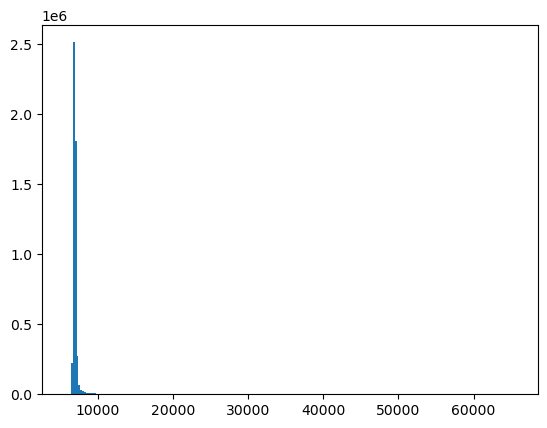

In [24]:
_ = plt.hist(img_HeLa_norm.ravel(), bins=256)